In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from ROOT import TFile, TChain, TTree, TCanvas
from PMTAnalysisTools import PMT, Ophit, Flash, Event

Welcome to JupyROOT 6.22/08


In [2]:
mc_geotree                = TChain("flashana/geotree")
mc_eventstree             = TChain("flashana/eventstree")
mc_opflashCryoE_flashtree = TChain("flashana/opflashCryoE_flashtree")
mc_opflashCryoE_ophittree = TChain("flashana/opflashCryoE_ophittree")
mc_opflashCryoW_flashtree = TChain("flashana/opflashCryoW_flashtree")
mc_opflashCryoW_ophittree = TChain("flashana/opflashCryoW_ophittree")

dat_geotree                = TChain("flashana/geotree")
dat_eventstree             = TChain("flashana/eventstree")
dat_opflashCryoE_flashtree = TChain("flashana/opflashCryoE_flashtree")
dat_opflashCryoE_ophittree = TChain("flashana/opflashCryoE_ophittree")
dat_opflashCryoW_flashtree = TChain("flashana/opflashCryoW_flashtree")
dat_opflashCryoW_ophittree = TChain("flashana/opflashCryoW_ophittree")

filenames_mc = ["./muon_mc/" + "Supplemental-MC_Truth_LightAnalysis_20211210T155938-G4_20211210T165323-DetSim_20211210T192846-MCstage0_20211216T213910-MCstage1-opana.root"]
filenames_dat = ["./muon_data/" + "Supplemental-BNB_Lrun7033_1_20211222T154147-stage0_20211222T155518-stage1-opana.root" ]

for filename in filenames_mc:
    mc_geotree.Add(filename)
    mc_eventstree.Add(filename)
    mc_opflashCryoE_flashtree.Add(filename)
    mc_opflashCryoE_ophittree.Add(filename)
    mc_opflashCryoW_flashtree.Add(filename)
    mc_opflashCryoW_ophittree.Add(filename)
    
for filename in filenames_dat:
    dat_geotree.Add(filename)
    dat_eventstree.Add(filename)
    dat_opflashCryoE_flashtree.Add(filename)
    dat_opflashCryoE_ophittree.Add(filename)
    dat_opflashCryoW_flashtree.Add(filename)
    dat_opflashCryoW_ophittree.Add(filename)

In [3]:
mc_pmts    = {}
mc_events  = {}

for record in mc_geotree:
    for channel in range(len(record.pmt_x)):
        mc_pmts[channel] = PMT((record.pmt_x[channel],
                                record.pmt_y[channel],
                                record.pmt_z[channel]))

for event in mc_eventstree:
    mc_events[event.event]=Event([event.run,
                               event.event,
                               event.timestamp,
                               event.beam_gate_start,
                               event.beam_gate_width,
                               event.beam_type])
    
for flash in mc_opflashCryoE_flashtree:
    _flash = Flash([flash.run,
                    flash.event,
                    flash.timestamp,
                    flash.flash_id,
                    flash.multiplicity,
                    flash.multiplicity_right,
                    flash.multiplicity_left,
                    flash.sum_pe,
                    flash.sum_pe_right,
                    flash.sum_pe_left,
                    flash.flash_time,
                    flash.flash_y,
                    flash.flash_width_y,
                    flash.flash_z,
                    flash.flash_width_z])
    mc_events[flash.event].AddFlash(_flash)


for flash in mc_opflashCryoW_flashtree:
    _flash = Flash([flash.run,
                    flash.event,
                    flash.timestamp,
                    flash.flash_id,
                    flash.multiplicity,
                    flash.multiplicity_right,
                    flash.multiplicity_left,
                    flash.sum_pe,
                    flash.sum_pe_right,
                    flash.sum_pe_left,
                    flash.flash_time,
                    flash.flash_y,
                    flash.flash_width_y,
                    flash.flash_z,
                    flash.flash_width_z])
    mc_events[flash.event].AddFlash(_flash)
    
for ophit in mc_opflashCryoE_ophittree:
    
    _ophit = Ophit([ophit.run,
                    ophit.event,
                    ophit.timestamp,
                    ophit.flash_id,
                    ophit.channel_id,
                    ophit.integral,
                    ophit.amplitude,
                    ophit.start_time,
                    ophit.abs_start_time,
                    ophit.pe,
                    ophit.width,
                    ophit.fast_to_total])
    
    (((mc_events[_ophit.event]).GetFlashes())[_ophit.flash_id]).AddOpHit(_ophit)

for ophit in mc_opflashCryoW_ophittree:
    
    _ophit = Ophit([ophit.run,
                    ophit.event,
                    ophit.timestamp,
                    ophit.flash_id,
                    ophit.channel_id,
                    ophit.integral,
                    ophit.amplitude,
                    ophit.start_time,
                    ophit.abs_start_time,
                    ophit.pe,
                    ophit.width,
                    ophit.fast_to_total])
    (((mc_events[_ophit.event]).GetFlashes())[_ophit.flash_id]).AddOpHit(_ophit)

In [4]:
dat_pmts    = {}
dat_events  = {}

for record in dat_geotree:
    for channel in range(len(record.pmt_x)):
        dat_pmts[channel] = PMT((record.pmt_x[channel],
                                record.pmt_y[channel],
                                record.pmt_z[channel]))

for event in dat_eventstree:
    #print('events: ')
    #print(event.event)
    dat_events[event.event]=Event([event.run,
                               event.event,
                               event.timestamp,
                               event.beam_gate_start,
                               event.beam_gate_width,
                               event.beam_type])
    
for flash in dat_opflashCryoE_flashtree:
    #print('events associated with flashes:')
    #print(flash.event)
    _flash = Flash([flash.run,
                    flash.event,
                    flash.timestamp,
                    flash.flash_id,
                    flash.multiplicity,
                    flash.multiplicity_right,
                    flash.multiplicity_left,
                    flash.sum_pe,
                    flash.sum_pe_right,
                    flash.sum_pe_left,
                    flash.flash_time,
                    flash.flash_y,
                    flash.flash_width_y,
                    flash.flash_z,
                    flash.flash_width_z])
    dat_events[flash.event].AddFlash(_flash)


for flash in dat_opflashCryoW_flashtree:
    _flash = Flash([flash.run,
                    flash.event,
                    flash.timestamp,
                    flash.flash_id,
                    flash.multiplicity,
                    flash.multiplicity_right,
                    flash.multiplicity_left,
                    flash.sum_pe,
                    flash.sum_pe_right,
                    flash.sum_pe_left,
                    flash.flash_time,
                    flash.flash_y,
                    flash.flash_width_y,
                    flash.flash_z,
                    flash.flash_width_z])
    dat_events[flash.event].AddFlash(_flash)
    
for ophit in dat_opflashCryoE_ophittree:
    
    _ophit = Ophit([ophit.run,
                    ophit.event,
                    ophit.timestamp,
                    ophit.flash_id,
                    ophit.channel_id,
                    ophit.integral,
                    ophit.amplitude,
                    ophit.start_time,
                    ophit.abs_start_time,
                    ophit.pe,
                    ophit.width,
                    ophit.fast_to_total])
    
    (((dat_events[_ophit.event]).GetFlashes())[_ophit.flash_id]).AddOpHit(_ophit)

for ophit in dat_opflashCryoW_ophittree:
    
    _ophit = Ophit([ophit.run,
                    ophit.event,
                    ophit.timestamp,
                    ophit.flash_id,
                    ophit.channel_id,
                    ophit.integral,
                    ophit.amplitude,
                    ophit.start_time,
                    ophit.abs_start_time,
                    ophit.pe,
                    ophit.width,
                    ophit.fast_to_total])
    (((dat_events[_ophit.event]).GetFlashes())[_ophit.flash_id]).AddOpHit(_ophit)

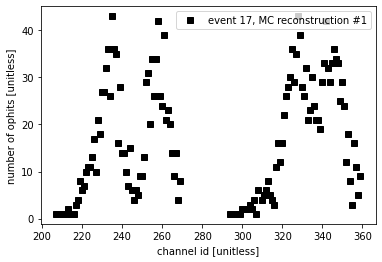

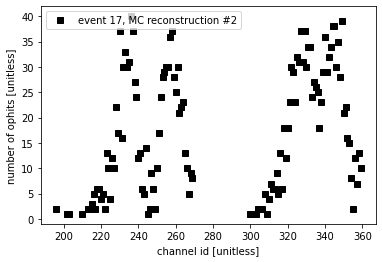

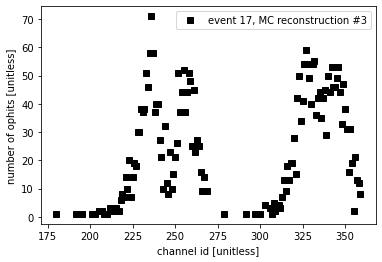

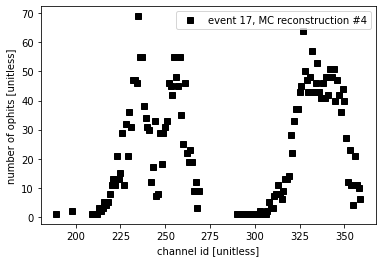

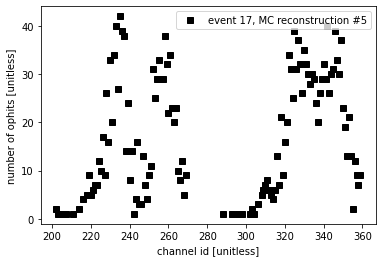

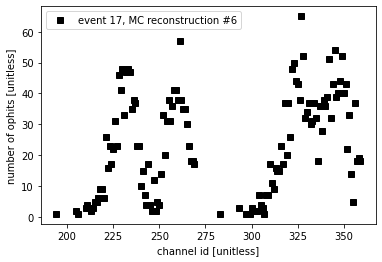

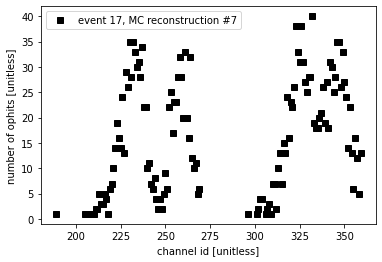

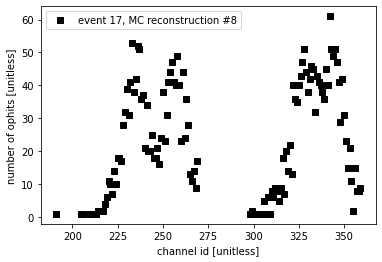

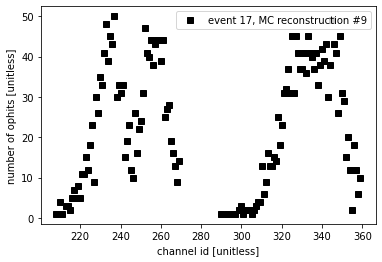

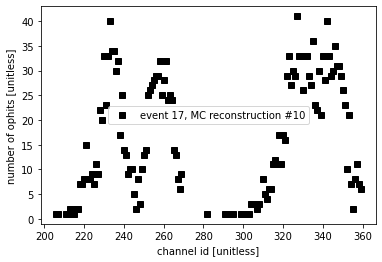

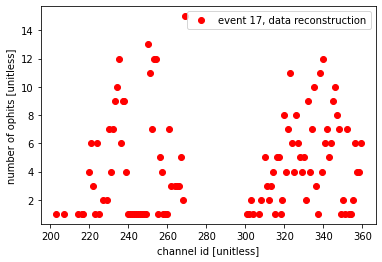

In [26]:
for event_number, event in mc_events.items():
    mc_channels = {}
    for flash_number, flash in event.GetFlashes().items():
        for ophit in flash.GetOpHits():
            if ophit.channel_id in mc_channels:
                mc_channels[ophit.channel_id] += 1
            else:
                mc_channels[ophit.channel_id] = 1
    plt.plot(mc_channels.keys(),mc_channels.values(),'ks',label='event 17, MC reconstruction #'+str(event_number))
    plt.xlabel('channel id [unitless]')
    plt.ylabel('number of ophits [unitless]')
    plt.legend()
    plt.show()

for event_number, event in dat_events.items():
    dat_channels = {}
    if event_number== 27:
        pass
    else:
        continue
    for flash_number, flash in event.GetFlashes().items():
        for ophit in flash.GetOpHits():
            if ophit.channel_id in dat_channels:
                dat_channels[ophit.channel_id] += 1
            else:
                dat_channels[ophit.channel_id] = 1
    plt.plot(dat_channels.keys(),dat_channels.values(),'ro',label='event 17, data reconstruction')
    plt.xlabel('channel id [unitless]')
    plt.ylabel('number of ophits [unitless]')
    plt.legend()
    plt.show()
            